In [1]:
from databaseconfig import password
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

user = "postgres"
host = "localhost"
port = "5432"
db = "employee_db"

uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"


In [2]:
engine = create_engine(uri)

In [3]:
connection = engine.connect()

In [4]:
employee_df = pd.read_sql_query('SELECT * FROM employees',engine)
salaries_df = pd.read_sql_query('SELECT * FROM salaries',engine)
titles_df = pd.read_sql_query('SELECT * FROM titles',engine)

In [5]:
merged_df = employee_df.merge(salaries_df, on = "emp_no")


Text(0.5, 1.0, 'Num of Employees by Salary')

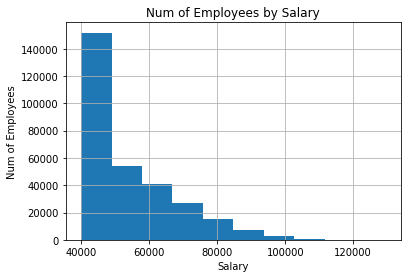

In [6]:
merged_df.hist(column = "salary", bins=10)
plt.xlabel("Salary")
plt.ylabel("Num of Employees")
plt.title("Num of Employees by Salary")

In [7]:
merged_titles = merged_df.merge(titles_df, on = "emp_no")
grouped_df = merged_titles.groupby(merged_titles["title"])
bar_data = pd.DataFrame(grouped_df["salary"].mean())

Text(0.5, 1.0, 'Average Salary by Title')

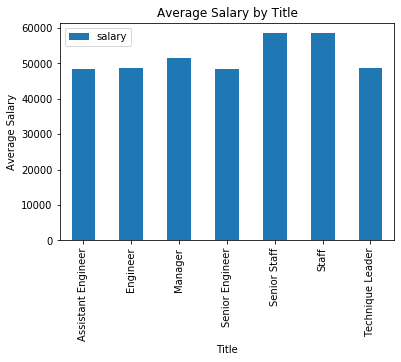

In [8]:
bar_data.plot(kind = 'bar')
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")

In [9]:
employee_df.loc[employee_df["emp_no"] == 499942]

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10
